In [12]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt


In [ ]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [15]:
base_model = DecisionTreeClassifier(max_depth=1, random_state=42)
base_model.fit(X_train, y_train)
base_pred = base_model.predict_proba(X_test)[:, 1]
base_auc = roc_auc_score(y_test, base_pred)


In [16]:
adaboost = AdaBoostClassifier( n_estimators=50, random_state=42)
adaboost.fit(X_train, y_train)
ada_pred = adaboost.predict_proba(X_test)[:, 1]
ada_auc = roc_auc_score(y_test, ada_pred)


c:\Users\ASLAM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [ ]:

performance = pd.DataFrame({
    'Model': ['Decision Tree (Depth=1)', 'AdaBoost (n=50)'],
    'ROC-AUC': [base_auc, ada_auc]
})

print(performance)


                     Model   ROC-AUC
0  Decision Tree (Depth=1)  0.897150
1          AdaBoost (n=50)  0.997052


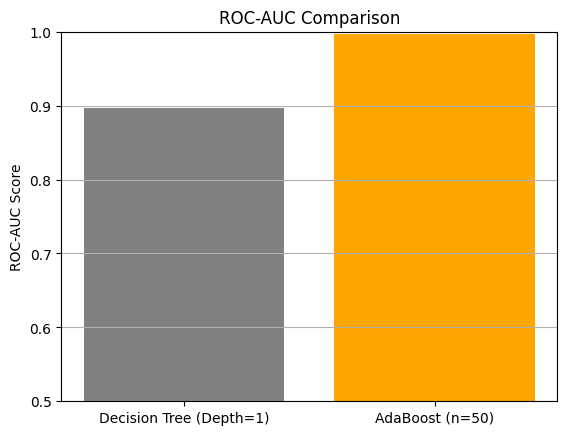

In [18]:
plt.bar(performance['Model'], performance['ROC-AUC'], color=['gray', 'orange'])
plt.title('ROC-AUC Comparison')
plt.ylim(0.5, 1.0)
plt.ylabel('ROC-AUC Score')
plt.grid(True, axis='y')
plt.show()
